In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from scipy.stats import pearsonr

In [3]:
# Loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/workspaces/Gold-Price-Prediction/Version 1/gld_price_data.csv')

In [4]:
# Print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# Print last 5 rows in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# Number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# Getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# Getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
# Checking for correlation
correlation = gold_data.drop(['Date'], axis=1).corr()

<Axes: >

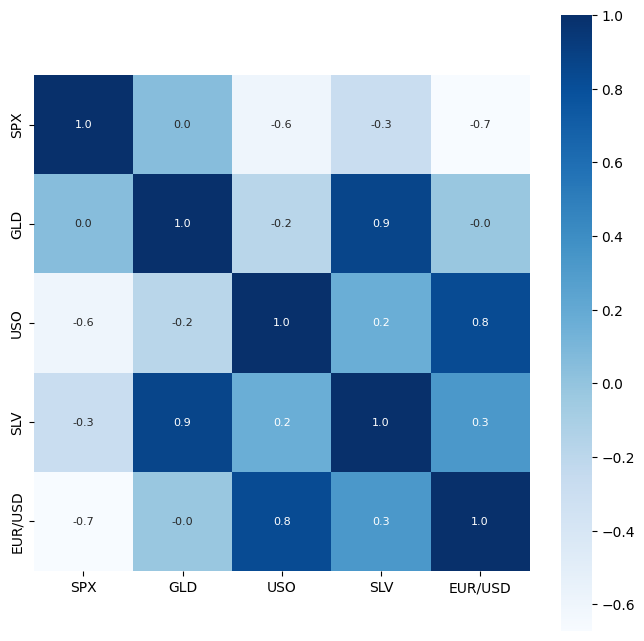

In [11]:
# Constructing heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
# Checking correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipykernel_11476/3860273349.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

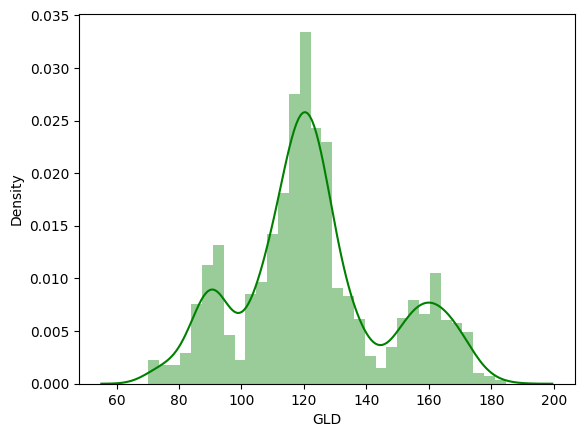

In [13]:
# Checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'], color='green')

In [14]:
# Splitting the Features and Target
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [17]:
#  Splitting dataset into Train and Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
# Model Training: Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
# Training the model
regressor.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[122.60069961 130.56840294 127.57910003  96.65709743 119.01790066
 114.34469901 124.80500118 117.71459886 108.02810123  98.33919961
  95.48879946 167.6690989  150.02570146 116.60030014 170.93820179
  84.86659959 123.13999867 109.4589974  113.15190073 131.68390299
 124.23379892 113.8435012  116.33370005 108.91019996 108.69180132
 125.81859934 119.46769966 112.20469908 113.34250161 125.58929872
 145.99480178  89.64770008 167.79109973 113.51879956 108.38130119
 120.10460105 141.7990985  161.25660117 173.71729806 152.99690189
 119.4400013  113.23750037 121.34319932 113.68159947 122.06113831
 107.91020046  88.47489884 114.52679929 129.64570221 117.76250139
 103.92130002 129.59630238 107.35729841 160.52710442 131.51000023
 118.12869995 147.36610087 135.10010159  95.5104009  124.59210152
 114.81119863  86.29890092 104.36299908 113.9594006   84.30139924
 122.3046381  116.62629901 113.71850188 165.38080337  92.20040031
  80.25620109 160.90460015 158.58170223 106.5943002  148.60120089
 109.71699

In [22]:
from os import error
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9900411625357386


In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
pearson_corr, _ = pearsonr(Y_test, test_data_prediction)

In [24]:
print("MAE: ", mae)
print("RMSE: ", rmse)
print("Pearson Correlation: ", pearson_corr)

MAE:  1.2409960695414846
RMSE:  2.3367562009346283
Pearson Correlation:  0.9950120323665074


In [30]:
mape = np.mean(np.abs((Y_test - test_data_prediction)/Y_test)) * 100
print("MAPE (%): ", mape)

MAPE (%):  1.0062523284551306


In [25]:
# Compare actual values vs the predicted values
Y_test = list(Y_test)

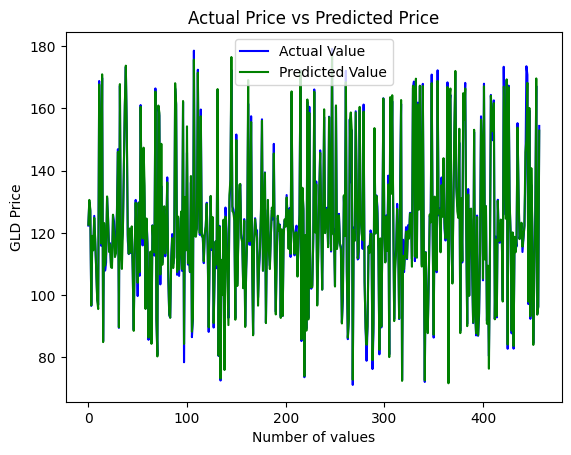

In [26]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

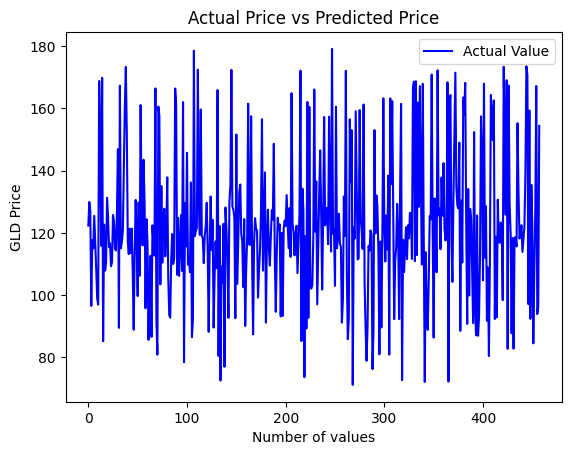

In [27]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

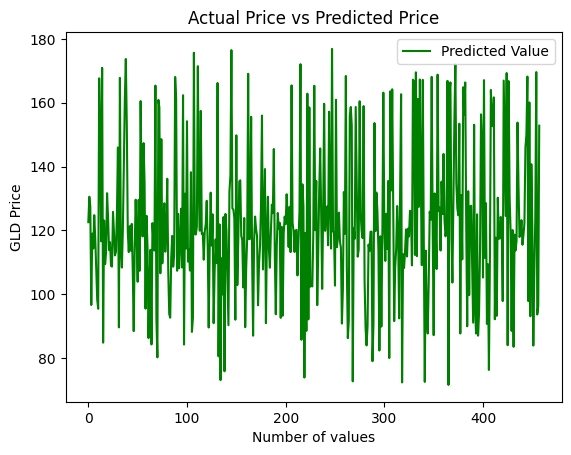

In [28]:
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()